In [77]:
import sys
sys.path.append("..")

import os
import glob
import numpy as np

%load_ext autoreload
%autoreload 2

from sicm import io
from sicm.models.temperature import TemperatureModel
from sicm.models.comsol import ComsolModel, ComsolData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study5\\results\\_saved\\004"
exp_name = "ecJz" + ".txt"
comd = ComsolData(datadir, exp_name)
comd.data.head()

,rUME (m),d (m),Tsub (K),"Current density, z component (A)","Current density, r component (A)","Current density, phi component (A)"
0,0.000001,1.100000e-09,301.700012,-4.882232e-09,-2.718863e-10,0.0
1,0.000001,1.100000e-09,301.850006,-4.892002e-09,-2.724304e-10,0.0
2,0.000001,1.100000e-09,302.000000,-4.901772e-09,-2.729744e-10,0.0
3,0.000001,1.575407e-09,301.700012,-4.928637e-09,-2.744705e-10,0.0
4,0.000001,1.575407e-09,301.850006,-4.938439e-09,-2.750163e-10,0.0


In [79]:
datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study5\\results\\_saved\\004"
exp_name = "T_tip" + ".txt"
comt = ComsolData(datadir, exp_name)
comt.data.head()

,rUME (m),d (m),Tsub (K),Temperature (K)
0,0.000001,1.100000e-09,301.700012,301.691132
1,0.000001,1.100000e-09,301.850006,301.840759
2,0.000001,1.100000e-09,302.000000,301.990387
3,0.000001,1.575407e-09,301.700012,301.689972
4,0.000001,1.575407e-09,301.850006,301.839539


In [80]:
T = 301.850006
dsub = comd.data[comd.data["Tsub (K)"]==T]
x = dsub["d (m)"].values / 220e-9
y = dsub.iloc[:, 3].values / dsub.iloc[-1, 3]

dsub2 = comt.data[comt.data["Tsub (K)"]==T]
T2 = dsub2["Temperature (K)"].values - 298.15

In [81]:
tm = TemperatureModel(x, y, T2)

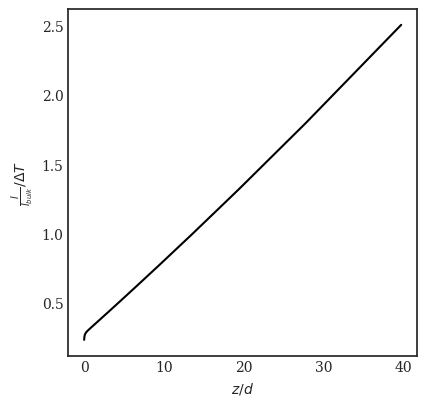

In [82]:
tm.plot()

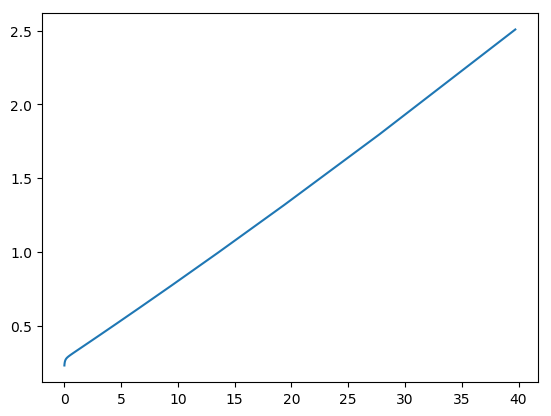

In [91]:
import matplotlib.pyplot as plt
plt.plot(tm.x, tm.y/tm.T)
# plt.xscale('log')